> # **Métodos Computacionales I - Taller #3**

**Hecho por:** Claudia Alejandra Cuellar Nieto & Thomas Andrade Hernández


In [1]:
# Zona de librerías:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import axes3d
from matplotlib import rc
import sympy as sym
import pandas as pd
from tqdm import tqdm
from time import sleep
import os.path as path
import os
import wget

> # **5. ÁLGEBRA LINEAL**

**$3)\verb| (Python)|$** Implemente un algoritmo que realice la multiplicación de dos matrices. Use el algoritmo para calcular:

$$
\mathbb{AB}

=

\begin{pmatrix}
    1 & 0 & 0\\
    5 & 1 & 0\\
    -2 & 3 & 1
\end{pmatrix}

\cdot 

\begin{pmatrix}
    4 & -2 & 1\\
    0 & 3 & 7\\
    0 & 0 & 2
\end{pmatrix}$$

In [108]:
def GetMultiplication(A,B):
    matrix_column = []
    for i in range(len(B)):
        column = []
        for j in range(len(B)): 
            column.append(B[j][i])
        matrix_column.append(column)
    

    multiplication_matrix =[]
    for k in A:
        new_matrix = []
        for w in matrix_column:
            new_matrix.append(np.dot(k,w))
        multiplication_matrix.append(new_matrix)
        
    return np.array(multiplication_matrix)

In [109]:
A = np.array([[1,0,0],[5,1,0],[-2,3,1]])
B = np.array([[4,-2,1],[0,3,7],[0,0,2]])

print("El resultado de la multiplicación entre las matrices dadas es:\n {}".format(GetMultiplication(A,B)))

El resultado de la multiplicación entre las matrices dadas es:
 [[ 4 -2  1]
 [20 -7 12]
 [-8 13 21]]


**$4)\verb| (Theoretical)|$** Muestre con detalle que la sustitución hacia adelante se expresa como:

$$x_{i} = b_{i} - \sum_{j = 0}^{i - 1} A_{ij} \cdot x_{j}$$

**$\verb|Respuesta:|$** Este método de sustitución hacia delante se usa especialmente para solucionar sistemas de la forma $Lx = b$ donde L es la matriz triangular inferior que aparece en la factorización de una matriz A. Así, sea el sistema de solución de matrices dado por,

$$ \begin{bmatrix}
l_{11} & 0 & 0  \\
l_{21} & l_{22} & 0  \\
l_{31} & l_{32} & l_{33}  \\

\end{bmatrix} 
\begin{bmatrix}
x_1  \\
x_2  \\
x_3 
\end{bmatrix} 
= 
\begin{bmatrix}
b_1  \\
b_2  \\
b_3 
\end{bmatrix} 
$$

La solución para la primera variable sería de la forma,

$$ L_{11} x_1 = b_1 \rightarrow x_1 = \frac{b_1}{L_{11}} $$

La solución para la segunda variable sería de la forma,

$$ L_{21} x_1 + L_{22} x_2 = b_2 $$

Sustituyendo $x_1$ y despejando la para $x_2$ obtenemos que,

$$ x_2 = \frac{b_2 - L_{21} (b_1/L_{11})}{L_{22}} $$

Para la solución de la tercera variable obtenemos que,
$$ L_{33}  x_3 + L_{31} x_1 + L_{32}  x_2 = b_3 $$

Como podemos observar la i-ésima solución dependerá de las soluciones anteriores por lo que la sumatoria se puede escribir de la forma, 

$$ b_i =  \sum_{j=1}^{i} A_{ij}  x_j $$

Sin embargo, si queremos despejar la variable i-ésima, debemos de cambiar los índices de la sumatoria y extraer el término de que deseamos,

$$ b_i =  L_{ii} x_i + \sum_{j=0}^{i-1} A_{ij}  x_j \rightarrow L_{ii}x_i = b_i - \sum_{j=0}^{i-1} A_{ij}  x_j$$

En este caso, la matriz factorizada L tiene la particularidad que su diagonal está compuesta solo por números uno. Por lo que nuestra ecuacion queda reducida a,

$$ x_i = b_i -  \sum_{j=0}^{i-1} A_{ij}  x_j $$

Y así queda mostrada la ecuación del enunciado para el método de sustitución hacia atrás.

**$5) \verb| (Theoretical)|$** Muestre con detaller que la sustitución hacia atrás se expresa como:

$$x_{i} = \frac{b_{i} - \sum_{j = i + 1}^{n} A_{i,j} \cdot x_{j}}{A_{i,i}}$$

donde $i = n, n - 1, ..., 0$. Note que la diagonal de la matriz triangular puede tener cualquier valor.


**$\verb|Respuesta:|$** El método de sustitución hacia atrás consiste en emplear una matriz triangular superior y, con base en esa estructura, iterar para obtener los resultados de interés del vector solución del sistema. Una forma de denotar este método la podemos hallar partiendo del siguinte escenario:

$$
  \left[ {\begin{array}{cccc}
    A_{11} & A_{12} & \cdots & A_{1n}\\
    0 & A_{22} & \cdots & A_{2n}\\
    \vdots & \vdots & \ddots & \vdots\\
    0 & 0 & \cdots & A_{nn}\\
  \end{array} } \right]
  \left[ {\begin{array}{cccc}
    x_{1} \\
    x_{2} \\
    \vdots \\
    x_{n} \\
  \end{array} } \right]
  =
  \left[ {\begin{array}{cccc}
    b_{1} \\
    b_{2} \\
    \vdots \\
    b_{n} \\
  \end{array} } \right]
$$

donde la matriz de los coeficientes es, ciertamente, una matriz triangular superior. Puede apreciarse que el valor de $x_n$ puede encontrarse de manera fácil, más explícitamente:

$$A_{n, n} \cdot x_{n} = b_{n} \quad \Rightarrow \quad x_{n} = \frac{b_{n}}{A_{n, n}}$$

Si vamos al valor de $n - 1$ obtendremos:

$$A_{n - 1, n - 1} \cdot x_{n - 1} + A_{n - 1, n} \cdot x_{n} = b_{n - 1} \quad \Rightarrow \quad x_{n - 1} = \frac{b_{n - 1} - A_{n - 1, n} \cdot x_{n}}{A_{n - 1, n - 1}}$$

Para verl el patrón aún mejor, probemos con $n - 2$:

$$A_{n - 2, n - 2} \cdot x_{n - 2} + A_{n - 2, n - 1} \cdot x_{n - 1} + A_{n - 2, n} \cdot x_{n} = b_{n - 2} \quad \Rightarrow \quad x_{n - 2} = \frac{b_{n - 2} - A_{n - 2, n - 1} \cdot x_{n - 1} - A_{n - 2, n} \cdot x_{n}}{A_{n - 2, n - 2}} = \frac{b_{n - 2} - \sum_{j = n - 1}^{n} A_{i, j} x_{j}}{A_{n - 2, n - 2}}$$

Se puede apreciar un patrón que se repite secuencialmente al ir escalando hacia atrás, mismo que se generaliza como:

$$x_{i} = \frac{b_{i} - A_{i, i + 1} \cdot x_{i + 1} - A_{i, i + 2} \cdot x_{i + 2} - ... - A_{i, n} \cdot x_{n}}{A_{i,i}} = \frac{b_{i} - \sum_{j = i + 1}^{n} A_{ij} \cdot x_{j}}{A_{i, i}}$$


- **$6) \verb| Successive over-relaxation (SOR)|$**. El método de sobre relajación sucesiva se basa en los métodos de Jacobi y Gauss-Seidel, pero incluye un parámetro de escala que reduce el error de aproximación en el paso $(k)$. La formula iterativa está dada por:

$$x_{i}^{(k)} = (1 - \omega) \cdot x_{i}^{(k - 1)} + \frac{\omega}{a_{ii}} \cdot \left[ b_{i} - \sum_{j = 1}^{i - 1} a_{ij}x_{j}^{(k)} -  \sum_{j = 1}^{i - 1} a_{ij}x_{j}^{(k - 1)}\right]$$

donde $i$ se refiere a la componente del vector, el índice $k$ al paso de la iteración y $0 < \omega < 2$ es parámetro de relajación. Implemente este método para solucionar el sistema de ecuaciones de clase $(5.4)$ y encuentre el parámetro de relajación que minimiza el número de iteraciones para resolverlo. Cuando $1 < \omega < 2$ el método se denomina SOR.


In [110]:
omega_list = np.linspace(1e-10, 2 - 1e-10, 50)

def SuccesiveOverRelaxation(A, x_init, b, omega, iterations = 1000, tolerance = 1e-9):
    x = x_init.copy()
    diverge = None
    it = 0
    while it <= iterations:
        for i in range(len(x_init)):
            sum = 0
            for j in range(len(x_init)):
                if j != i:
                    sum += A[i, j]*x[j]
            x[i] = (1 - omega)*x[i] + (omega/A[i, i])*(b[i] - sum)
        it += 1

        residuo = np.linalg.norm(np.dot(A,x) - b)
        
        # Comprobamos si la expresión no se encuentra divergiendo:
        if residuo > 1e+10:
            diverge = True
        else:
            diverge = False

        if np.allclose(residuo,tolerance,atol=tolerance):
            break
        
    return x, diverge, it

In [111]:
# Verificamos la efectividad del algoritmo:

A = np.array([[3,-1,-1],[-1.,3.,1.],[2,1,4]])
b = np.array([1.,3.,7.])
x_init = np.array([0., 0., 0.])

SuccesiveOverRelaxation(A, x_init, b, 1)

(array([1., 1., 1.]), False, 16)

In [112]:
omega_min = 1e+10
min_it = 1e+10

# Buscamos en todos los casos en los que la expresión no diverge cuál es la de menor iteraciones:

for omega in omega_list:
    data = SuccesiveOverRelaxation(A, x_init, b, omega)
    if data[1] == False:
        if min_it > data[2]:
            min_it = data[2]
            omega_min = omega
        
print("\nEl valor de omega que minimiza las iteraciones es de aproximadamente {}, con un total de {} hasta llegar a la respuesta.\n".format(round(omega_min, 5), min_it))

C:\Users\Darck\AppData\Local\Temp\ipykernel_2180\1577802233.py:12: RuntimeWarning: overflow encountered in double_scalars
  sum += A[i, j]*x[j]
C:\Users\Darck\AppData\Local\Temp\ipykernel_2180\1577802233.py:12: RuntimeWarning: invalid value encountered in double_scalars
  sum += A[i, j]*x[j]



El valor de omega que minimiza las iteraciones es de aproximadamente 0.97959, con un total de 15 hasta llegar a la respuesta.



**$7)\verb| (Python)|$** Implemente la descomposición $LU$ para factorizar la siguiente matriz $\mathbb{A} = LU$:

$$
\mathbb{A}

=

\begin{pmatrix}
    4 & -2 & 1\\
    20 & -7 & 12\\
    -8 & 13 & 17
\end{pmatrix}

=

\begin{pmatrix}
    1 & 0 & 0\\
    5 & 1 & 0\\
    -2 & 3 & 1
\end{pmatrix}
\cdot
\begin{pmatrix}
    4 & -2 & 1\\
    0 & 3 & 7\\
    0 & 0 & -2
\end{pmatrix}
$$

In [113]:
def FactorizationLU(m):
    A = np.array(m)
    n = A.shape[0]
    L = np.zeros((n,n))
    U = np.zeros((n,n))
    
    for j in range(n):
        L[j][j] = 1.0
        
        for i in range(j+1,n):
            L[i][j] = A[i][j] / A[j][j]
            
            for k in range(j+1,n):
                A[i][k] = A[i][k] - L[i][j]*A[j][k]
                
        for k in range(j,n):
            U[j][k] = A[j][k]
    
    return L,U

In [114]:
M = np.array([[4,-2,1],[20,-7,12],[-8,13,17]])
L,U = FactorizationLU(M)

print("Dada la matriz A su respectiva factorización es: \n L: \n {} \n U: \n {}".format(L,U))

Dada la matriz A su respectiva factorización es: 
 L: 
 [[ 1.  0.  0.]
 [ 5.  1.  0.]
 [-2.  3.  1.]] 
 U: 
 [[ 4. -2.  1.]
 [ 0.  3.  7.]
 [ 0.  0. -2.]]


**$9)\verb| Método de Jacobi: Diagonalización de matrices simétricas.|$** Cuando la matriz es simétrica $a_{ij}= a_{ji}$, es posible encontrar todos los valores y vectores propios mediante la transformación de la matriz $\mathbb{A}$ usando matrices de rotación. En particular, una rotación alrededor del eje $z$ está dada por:

$$R(\theta) = 
\begin{pmatrix}
\cos\theta & -\sin\theta & 0\\
\sin\theta & \cos\theta & 0\\
0 & 0 & 1
\end{pmatrix}$$

donde $i, j$ es la posición del elemento más grande fuera de la diagonal. Investigue en la literatura el algoritmo de Jacobi para diagonalizar matrices simétricas.

$(a)$ Implemente el método de Jacobi para encontrar los valores propios de:

$$ \mathbb{A} = 
\begin{pmatrix}
4 & 1 & 1\\
1 & 3 & 2\\
1 & 2 & 5
\end{pmatrix}
$$


In [115]:
def GetJacobiEig(A, it=1000):
    n = A.shape[0]
    #Matriz para los valores propios.
    D = A.copy()
    #Matriz para los vectores propios.
    B = -np.eye(n)
     
    #Encontrar los índices del máximo elemento no diagonal. 
    for k in range(it):
        max_index = (0, 0)
        max_value = 0
        for i in range(n):
            for j in range(i+1, n):
                value = np.abs(D[i][j])
                if value > max_value:
                    max_value = value
                    max_index = (i,j)
        
        #Indice de la fila.          
        i = max_index[0]
        #Indice de la columna.
        j = max_index[1]

        #Se calcula el ángulo de rotación teniendo en cuenta los signos del cuadrante.
        if D[i][i] == D[j][j]:
            theta = np.pi / 4
        else:
            t = (2 * D[i][j]) / (D[j][j] - D[i][i]) 
            if t >= 0:
                theta = 0.5 * np.tan(t)
            else:
                theta = 0.5 * np.tan(t) + np.pi
        
        #Se asignan los valores para la matriz de rotación.
        R = np.eye(n)
        R[i][i] = np.cos(theta)
        R[j][j] = np.cos(theta)
        R[i][j] = np.sin(theta)
        R[j][i] = -np.sin(theta)

        #Se actualizan las matrices D y B
        #Para los valores propios será el producto punto entre la transpuesta de R, y el producto punto de D y R.
        D = np.dot(R.T, np.dot(D, R))
        #Para los vectores propios será el producto punto de la matriz B existente y R.
        B = np.dot(B, R)


    #Los valores propios serán la diagonal de la matriz D.
    eigen_values = np.diag(D)
    #Los vectores propios serán la matriz B.
    eigen_vectors = B

    return eigen_values, eigen_vectors

In [116]:
C = np.array([[4,1,1],[1,3,2],[1,2,5]])
values,vectors = GetJacobiEig(C)

print("Mediante el método de Jacobi los valores propios de la matriz son {} \n y sus repectivos vectores propios:\n {}".format(values,vectors))

Mediante el método de Jacobi los valores propios de la matriz son [6.89510652 3.39729507 1.70759841] 
 y sus repectivos vectores propios:
 [[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]


$(b)$ Compare con el resultado que se obtiene de Numpy: $\verb|np.align.eig(A)|$.

In [117]:
values,vectors = np.linalg.eig(C)
print("Los valores propios de la matriz son {} \n y sus repectivos vectores propios:\n {}".format(values,vectors))

Los valores propios de la matriz son [6.89510652 3.39729507 1.70759841] 
 y sus repectivos vectores propios:
 [[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]


Como se puede observar, se llegan a los mismos valores y vectores propios por el método de Jacobi.

- **$10)\verb| Quantum system - ground state.|$** Un sistema cuántico de tres niveles está descrito por el siguiente Hamiltoniano:

$$\hat{H} = 
\begin{pmatrix}
1 & 2 & -1\\
1 & 0 & 1\\
4 & -4 & 5
\end{pmatrix}$$

Implemente el algoritmo de la potencia inversa para encontrar el valor del estado base $E_0$ y su vector propio $\lvert \varphi_{0} \rangle$. **Ans.** $E_{0} = 1$ y $\lvert \varphi_{0} \rangle = [0.40824829, −0.40824829, −0.81649658]$.

In [386]:
H = np.array([[1., 2., -1.], [1., 0., 1.], [4., -4., 5.]])
x0 = -np.random.rand(3)

def Inverse_Power(H, x0, iterations = 1000, tolerance = 1e-9):
    n = H.shape[0]
    x = x0 / np.linalg.norm(x0)
    eigvalue = 0
    
    for i in range(iterations):
        x_temp = np.linalg.solve(H, x)
        x_temp = x_temp / np.linalg.norm(x_temp)
        eigvalue_temp = np.dot(x_temp, x)

        if np.abs(eigvalue_temp - eigvalue) < tolerance:
            break

        eigvalue = eigvalue_temp
        x = x_temp
    
    eigvec = x
    eigvalue = 1 / eigvalue
    
    return eigvalue, eigvec

eigvalue, eigvector = Inverse_Power(H, x0)
print("El eigenvalue obtenido es igual a {}, con un eigenvector asociado con coordenadas {} con respecto al origen.".format(round(eigvalue, 5), eigvector))

El eigenvalue obtenido es igual a 1.0, con un eigenvector asociado con coordenadas [ 0.40824082 -0.40828517 -0.81648187] con respecto al origen.


- **$12)\verb| Jacobiano de cuarto orden.|$** Usando el operador derivada central de orden $\mathfrak{O}(h^4)$ es posible mejorar la estimación del Jacobiano para funciones vectoriales.

$(a)$ Escriba una función que estime el Jacobiano con el operador derivada de orden $\mathfrak{O}(h^4)$.

In [200]:
def CentralDerivativeH4(x, function, h, ward):
    up = function(x - 2*h*ward) - 8*function(x - h*ward) + 8*function(x + h*ward) - function(x + 2*h*ward)
    return up/(12*h)

def FourthOrderJacobian(functions, derivative, variables, x_point, h):
    n = len(functions)
    Jacobian = np.zeros((variables, n))
    for i in range(n):
        for j in range(variables):
            ward = np.zeros(variables)
            ward[j] += 1
            Jacobian[i, j] = derivative(x_point, functions[i], h, ward)

    return sym.Matrix(Jacobian)

$(b)$ Estime el Jacobiano de la siguiente función en el punto $x = (0.5, 0.5, 0.5)$ con $h = 0.01$:

$$6x_{1} - 2\cos(x_{2}x_{3}) - 1 = 0$$
$$9x_{2} + \sqrt{x_{1}^2 + \sin(x_{3}) +1.06} + 0.9 = 0$$
$$60x_{3} + 3e^{-x_{1}x_{2}} + 10\pi - 3 = 0$$

In [201]:
def Function_1(x):
    return 6*x[0] - 2*np.cos(x[1]*x[2]) - 1

def Function_2(x):
    return 9*x[1] + np.sqrt(x[0]**2 + np.sin(x[2]) + 1.06) + 0.9

def Function_3(x):
    return 60*x[2] + 3*(np.e**(-x[0]*x[1])) + 10*np.pi - 3

functions = [Function_1, Function_2, Function_3]

FourthOrderJacobian(functions, CentralDerivativeH4, 3, np.array([0.5, 0.5, 0.5]), h = 0.01)

Matrix([
[ 6.00000000000001,  0.24740395924937,  0.24740395924937],
[0.373777528039887,  8.99999999999998, 0.328020641570914],
[-1.16820117458278, -1.16820117458278,  60.0000000000004]])

$(c)$ Estime el Jacobiano usando la aproximación de orden $\mathfrak{O}(h^2)$ con $h = 0.01$. Para qué valor de $h$, el operador de segundo orden igualará en precisión al operador de cuarto orden; verifique su intuición en el código.

In [202]:
def CentralDerivativeH2(x, function, h, ward):
    up = function(x + h*ward) - function(x - h*ward)
    return up/(2*h)

FourthOrderJacobian(functions, CentralDerivativeH2, 3, np.array([0.5, 0.5, 0.5]), h = 0.0001)

Matrix([
[ 5.99999999999934, 0.247403959151571, 0.247403959151571],
[0.373777528155372,  8.99999999999679,  0.32802064129811],
[-1.16820117508354, -1.16820117508354,  60.0000000000023]])

- **$13)\verb| (Group theory, Sympy)|$**  El grupo de rotación $SO3$ (special orthogonal dim 3) describe las rotaciones en el espacio. Este grupo tiene el siguiente conjunto de generadores:

$$J_{x} = 
\begin{pmatrix}
0 & 0 & 0\\
0 & 0 & -1\\
0 & 1 & 0
\end{pmatrix},

J_{y} = 
\begin{pmatrix}
0 & 0 & 1\\
0 & 0 & 0\\
-1 & 0 & 0
\end{pmatrix},

J_{z} = 
\begin{pmatrix}
0 & -1 & 0\\
1 & 0 & 0\\
0 & 0 & 0
\end{pmatrix}.
$$

Verifique que el álgebra de Lie del grupo está dada por:

$$[J_{i}, J_{j}] = \epsilon_{ijk}J_{k}, \quad i, j = 1, 2, 3$$

donde $[A, B] = AB - BA$ es el conmutador y el símbolo Levi-Civita está definido por:

$$\epsilon_{ijk} = \left\{
        \begin{array}{cc}
        +1 \quad & \text{si} \quad & (i, j, k) = (1, 2, 3), (2, 3, 1), (3, 1, 2) \quad \text{Permutación par}\\
        \\
        -1 \quad & \text{si} \quad & (i, j, k) = (3, 2, 1), (1, 3, 2), (2, 1, 3) \quad \text{Permutación impar}\\
        \\
        0 \quad & \text{de otro modo} \quad & i = j \text{ o } j = k \text{ o } k = i
        \end{array}
        \right.
        $$

In [195]:
Jx = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]]), 1
Jy = np.array([[0, 0, 1], [0, 0, 0], [-1, 0, 0]]), 2
Jz = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 0]]), 3

J_list = [Jx, Jy, Jz] # Lista que agrupa los generadores SO3 con sus índices.

def GetOperation(J, K):
    operation = GetMultiplication(J[0], K[0]) - GetMultiplication(K[0], J[0])
    permutation = [J[1], K[1]] # Buscamos la permutación asociada:
    for i in [1, 2, 3]:
        if i not in permutation:
            permutation.append(i)
            
    return sym.Matrix(operation), permutation


def LieAlgebra_Verification(J, K):
    #Definimos los casos par e impar para el símbolo Levi-Civita:
    odd_case = [[3, 2, 1], [1, 3, 2], [2, 1, 3]]
    even_case = [[1, 2, 3], [2, 3, 1], [3, 1, 2]]

    result = GetOperation(J, K)
    levi_civita = 0
    
    # Verificamos el valor del símbolo:
    if result[1] in odd_case:
        levi_civita = -1
    if result[1] in even_case:
        levi_civita = 1
    
    simbol = sym.Matrix(levi_civita*J_list[result[1][-1] - 1][0])
    conmutador = result[0]
    
    return conmutador, simbol, conmutador == simbol

En el apartado anterior desarrollamos líneas de código que nos pueden ayudar a comprobar de manera inmediata el resultado del conmutador junto con el resultado del término de la base restante con el símbolo Levi-Cevita. Por ende, si calculamos cualquier caso, por ejemplo, $[J_{x}, J_{z}]$, el cual posee la permutación impar $(1, 3, 2)$, obtenemos:

In [182]:
LieAlgebra_Verification(Jx, Jz)[0] # El resultado del conmutador.

Matrix([
[0, 0, -1],
[0, 0,  0],
[1, 0,  0]])

In [183]:
LieAlgebra_Verification(Jx, Jz)[1] # El resultado empleando el símbolo Levi-Cevita.

Matrix([
[0, 0, -1],
[0, 0,  0],
[1, 0,  0]])

In [186]:
sym.Matrix(-1*Jy[0]) # Resultado esperado de esta permutación impar.

Matrix([
[0, 0, -1],
[0, 0,  0],
[1, 0,  0]])

Las tres matrices son, ciertamente, idénticas. Ahora probemos con una permutación par como la generada por el conmutador $[J_{y}, J_{z}]$, con permutación $(2, 3, 1)$:

In [187]:
LieAlgebra_Verification(Jy, Jz)[0] # El resultado del conmutador.

Matrix([
[0, 0,  0],
[0, 0, -1],
[0, 1,  0]])

In [188]:
LieAlgebra_Verification(Jy, Jz)[1] # El resultado empleando el símbolo Levi-Cevita.

Matrix([
[0, 0,  0],
[0, 0, -1],
[0, 1,  0]])

In [189]:
sym.Matrix(1*Jx[0]) # Resultado esperado de esta permutación impar.

Matrix([
[0, 0,  0],
[0, 0, -1],
[0, 1,  0]])

De igual manera queda corroborado el resultado. Para finalizar, verifiquemos para el conmutador entre índices idénticos:

In [192]:
LieAlgebra_Verification(Jx, Jx)[0] # El resultado del conmutador.

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [191]:
LieAlgebra_Verification(Jx, Jx)[1] # El resultado empleando el símbolo Levi-Cevita.

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

In [190]:
sym.Matrix(0*Jz[0]) # Resultado esperado de esta permutación impar.

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

**$14)\verb| (Group theory, Sympy)|$**  El grupo de rotación $SU2$ (special unitary dim 2) describe el operador del espín para una partícula fundamental con $s = 1/2$. Este grupo tiene el siguiente conjunto de generadores:

$$\sigma_{x} = 
\begin{pmatrix}
0 & 1\\
1 & 0
\end{pmatrix},

\sigma_{y} = 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}, 

\sigma_{z} = 
\begin{pmatrix}
1 & 0\\
0 & -1
\end{pmatrix}$$

Verifique que el álgebra de Lie del grupo está dada por:

$$[\sigma_{i}, \sigma_{j}] = 2i\epsilon_{ijk}\sigma_{k}, \quad i, j = 1, 2, 3.$$

donde $[A, B] = AB - BA$ es el conmutador.

**$15)\verb| (Particle Physics, Sympy)|$**  Las matrices de Dirac $\{\gamma^{0}, \gamma^{1}, \gamma^{2}, \gamma^{3}\}$ Son una representación del álgebra de Clifford $Cl_{1, 3}(\mathbb{R})$, que transforman correctamente el espacio de espinores de la teoría cuántica de campos:

$$\gamma^0 = 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & -1 & 0\\
0 & 0 & 0 & -1
\end{pmatrix}, \quad 

\gamma^1 = 
\begin{pmatrix}
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & -1 & 0 & 0\\
-1 & 0 & 0 & 0
\end{pmatrix}$$

$$\gamma^2 = 
\begin{pmatrix}
0 & 0 & 0 & -i\\
0 & 0 & i & 0\\
0 & i & 0 & 0\\
-i & 0 & 0 & 0
\end{pmatrix}, \quad 

\gamma^3 = 
\begin{pmatrix}
0 & 0 & 1 & 0\\
0 & 0 & 0 & -1\\
-1 & 0 & 0 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}$$

Verifique que el álgebra de Clifford está dada por una relación de anticonmutación.

$$\{\gamma^{\mu}, \gamma^{\delta}\} = \gamma^{\mu}\gamma^{\delta} + \gamma^{\delta}\gamma^{\mu} = 2\eta^{\mu\delta} \mathbb{I}_{4 \times 4}$$

donde $\eta^{\mu\delta} = diag(+1, -1, -1, -1)$ es la métrica del espacio de la relatividad especial.

**Respuesta:**

Dadas las matrices de Dirac se puede comprobar la propiedad anticonmutación la cual, asegura que se genere una representación matricial en el álgebra de Clifford dada por la siguiente relación:

$$ \gamma^u \gamma^v + \gamma^v \gamma^u = 2\mu^{uv} I_{4x4} \rightarrow \mu^{uv} = diag(1,-1,-1,-1)$$

Para comprobar la anterior relación, tomaremos dos casos específicos, cuando $u\neq v$ y $u=v$ . Para el primer caso, podemos observar que sin importar el orden de los índices, el resultado obtenido es la matriz cero.

In [123]:
i = sym.Symbol('i')
gamma_zero = np.array([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])
gamma_one = np.array([[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]])
gamma_two = np.array([[0,0,0,-i],[0,0,i,0],[0,i,0,0],[-i,0,0,0]])
gamma_three = np.array([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])

def GetRelation(a,b):
    z = GetMultiplication(a,b) + GetMultiplication(b,a)
    return sym.Matrix(z)

In [124]:
one = GetRelation(gamma_zero,gamma_one)
print("Para gamma^0 y gamma^1 obtenemos:")
one

Para gamma^0 y gamma^1 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [125]:
two = GetRelation(gamma_zero,gamma_two)
print("Para gamma^0 y gamma^2 obtenemos:")
two

Para gamma^0 y gamma^2 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [126]:
three = GetRelation(gamma_zero,gamma_three)
print("Para gamma^0 y gamma^3 obtenemos:")
three

Para gamma^0 y gamma^3 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [127]:
four = GetRelation(gamma_one,gamma_two)
print("Para gamma^1 y gamma^2 obtenemos:")
four

Para gamma^1 y gamma^2 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [128]:
five = GetRelation(gamma_one,gamma_three)
print("Para gamma^1 y gamma^3 obtenemos:")
five

Para gamma^1 y gamma^3 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [129]:
six = GetRelation(gamma_two,gamma_three)
print("Para gamma^2 y gamma^3 obtenemos:")
six

Para gamma^2 y gamma^3 obtenemos:


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

Con respecto al segundo caso, se puede observar que para la matriz $\gamma^0$ la relación da como resultado $2\mathbb{I}_{4x4}$. En cambio, para el resto de índices el resultado es $-2\mathbb{I}_{4x4}$ donde $\mathbb{I}$ es la matriz identidad.

In [130]:
one = GetRelation(gamma_zero,gamma_zero)
print("Para gamma^0 obtenemos:")
one

Para gamma^0 obtenemos:


Matrix([
[2, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 2]])

In [131]:
two = GetRelation(gamma_one,gamma_one)
print("Para gamma^1 obtenemos:")
two

Para gamma^1 obtenemos:


Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

In [132]:
three = GetRelation(gamma_two,gamma_two)
print("Para gamma^2 obtenemos:")
three

Para gamma^2 obtenemos:


Matrix([
[2*i**2,      0,      0,      0],
[     0, 2*i**2,      0,      0],
[     0,      0, 2*i**2,      0],
[     0,      0,      0, 2*i**2]])

In [133]:
four = GetRelation(gamma_three,gamma_three)
print("Para gamma^3 obtenemos:")
four

Para gamma^3 obtenemos:


Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

Dados estos resultados, se puede representar dicha relación de anticonmutación en una matriz cuyas filas y columnas estarán determinados por los índices de las matrices $u$ y $v$ respectivamente como se muestra a continuación,

$$\begin{bmatrix}
(\gamma^0,\gamma^0) & (\gamma^0,\gamma^1) & (\gamma^0,\gamma^2) & (\gamma^0,\gamma^3) \\
(\gamma^1,\gamma^0) & (\gamma^1,\gamma^1) & (\gamma^1,\gamma^2) & (\gamma^1,\gamma^3) \\
(\gamma^2,\gamma^0) & (\gamma^2,\gamma^1) & (\gamma^2,\gamma^2) & (\gamma^2,\gamma^3) \\
(\gamma^3,\gamma^0) & (\gamma^3,\gamma^1) & (\gamma^3,\gamma^2) & (\gamma^3,\gamma^3) 
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1 
\end{bmatrix}$$

Como podemos observar, la diagonal de dicha representación matricial corresponde a la métrica de Minkowsky, así podemos escribir la relación de anticonmutación como,

$$ \gamma^u \gamma^v + \gamma^v \gamma^u = 2\mu^{uv} I_{4x4} \rightarrow \mu^{uv} = diag(1,-1,-1,-1) $$

Por lo que queda verificada que la anterior relación cumple con el álgebra de Clifford.


> # **8.1. MÍNIMOS CUADRADOS**

**$1)\verb| (Python)|$** Se tienen tres líneas en $\mathbb{R}^2$:

$$2x - y = 2$$
$$x + 2y = 1$$
$$x + y = 4$$

$(a)$ Con el método de mínimos cuadrados encuentre el punto común a las tres líneas. Grafique las tres líneas y el punto solución. ¿Qué interpretación puede dar?

In [2]:
A = np.array([[2.,-1.],[1.,2.],[1.,1.]])
b = np.array([2.,1.,4.])

M = np.dot(A.T,A)
n = np.dot(A.T,b)

#En esta parte del código se solucionará el sistema hallado Mx* = b.
x0 = np.array([0.,0.])

def Jacobi(A,b,x0, itmax=1000, tolerancia= 1e-9):
    x = x0.copy()
    for it in range(itmax):
        xn = np.zeros_like(x0)
        for i in range(A.shape[0]):
            sum_ = 0.
            for j in range(A.shape[1]):
                if j!=i:
                    sum_ += A[i,j]*x[j] 
            xn[i] = (b[i] - sum_)/A[i,i]
        residuo = np.linalg.norm( np.dot(A,xn) - b )
        x = xn.copy()
        if np.allclose(residuo,tolerancia,atol=tolerancia):
            break
    return x
  
solution = Jacobi(M,n,x0)
print("El punto solucón para el sistema de ecuaciones es: {}".format(solution))

El punto solucón para el sistema de ecuaciones es: [1.42857143 0.42857143]


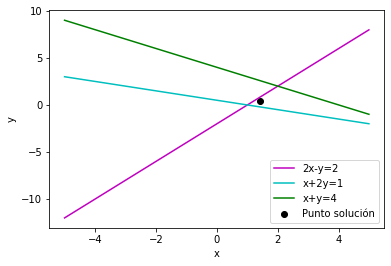

In [3]:
X = np.arange(-5., 5., 0.01)
Y = np.arange(-5., 5., 0.01)

y1 = (2*X) -2
y2 = (1 - X)/2
y3 = 4-X    

plt.plot(X, y1,color='m',label='2x-y=2')
plt.plot(X, y2,color='c',label='x+2y=1')
plt.plot(X, y3,color='g',label='x+y=4')
plt.scatter(solution[0],solution[1],color='k',label='Punto solución')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

$(b)$ Realice una búsqueda iterativa entre $-5 \leq x \leq 5$ y $-5 \leq y \leq 5$ con un paso de $h = 0.01$ para encontrar la menor distancia del problema. Grafique la distancia y compare con el resultado obtenido en los mínimos cuadrados.

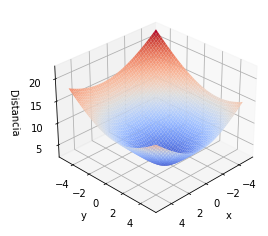

In [4]:
#En esta parte del código se hallarán las distancias mínimas.
Z = np.zeros((len(X), len(Y)))

for i in range(len(X)):
    for j in range(len(Y)):
        distance = np.linalg.norm(np.dot(A ,np.array([X[i],Y[j]]))-b)
        Z[i][j] = distance

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(X, Y)
ax.plot_surface(X, Y, Z, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Distancia')
ax.view_init(elev=30, azim=45)
plt.show()

**$6)\verb| (Python)|$** En el caso de ajustes, es posible definir funciones de costo que midan la distancia entre los puntos muestrales y el modelo de ajuste. En el caso de mínimos cuadrados la función es $\mathfrak{X}^2$. Para $n$ puntos y un modelo lineal la función de costo es:

$$\mathfrak{X}^2(a_{0}, a_{1}) = \sum_{i = 1}^{n} [y_{i} - (a_{0} + a_{1}x_{i})]^2$$

Si hablamos en términos Bayesianos, $\omega = \{a_{0}, a_{1} \}$ define el conjunto de modelos lineales que pueden explicar $n$ puntos muestrales. Al minimizar $\mathfrak{X}^2(a_{0}, a_{1})$ muestre (analíticamente) que los parámetros están dados por:

$$a_{0} = \bar{y} - a_{1}\bar{x}$$
$$a_{1} = \frac{\sum xy - \dfrac{\sum x \sum y}{n}}{\sum x^2 - \dfrac{(\sum x)^2}{n}}$$

donde $\bar{x}$ y $\bar{y}$ son los valores medios de puntos y sus imágenes. Para $n$ puntos y un modelo cuadrático la función de costo es:

$$\mathfrak{X}^2(a_{0}, a_{1}, a_{2}) = \sum_{i = 1}^{n} (y_{i} - (a_{0} + a_{1}x_{i} + a_{2}x_{i}^2))^2$$

Minimize $\mathfrak{X}^2(a_{0}, a_{1}, a_{2})$ para encontrar el siguiente sistema de ecuaciones. *¿Nota alguna regularidad?*

$$\sum_{i = 1}^{n} \left[a_{0} + a_{1}x_{i} + a_{2}x_{i}^{2}  = y_{i} \right]$$
$$\sum_{i = 1}^{n} \left[a_{0}x_{i} + a_{1}x_{i}^{2} + a_{2}x_{i}^{3}  = x_{i}y_{i} \right]$$
$$\sum_{i = 1}^{n} \left[a_{0}x_{i}^{2} + a_{1}x_{i}^{3} + a_{2}x_{i}^{4}  = x_{i}^{2}y_{i} \right]$$

**$\verb|Opcionalmente:|$** Encuentre los parámetros usando estas expresiones para los problemas $2)$ y $3)$.

**$\verb|Respuesta del modelo lineal:|$** La manera de encontrar analíticamente el valor de las constantes radica en aplicar el método convencional de hallar los máximos y mínimos de una función multivariada, lo que lleva consigo necesariamente el cálculo de las derivadas parciales de la función con respecto a las variables a optimizar. Antes de empesar con la demostración del valor de los coeficientes es preciso considerar una estrategia que será empleada durante toda la prueba. Dada una suma de términos finita, nos podemos dar el lujo de:

$$\sum_{i = 1}^{n}(x_{i} + y_{i}) = \sum_{i = 1}^{n} x_{i} + \sum_{i = 1}^{n} y_{i} \quad \Rightarrow \quad \text{$\verb|Separar la sumatoria.|$}$$
$$\sum_{i = 1}^{n} x_{i} = x_{1} + x_{2} + ... + x_{n} = n \cdot \frac{x_{1} + x_{2} + ... + x_{n}}{n} = n \cdot \overline{x} \quad \Rightarrow \quad \text{$\verb|Reescribir una suma como el promedio por el número de datos.|$}$$

Ahora, con lo anterior en mente, podemos empezar a derivar $\mathfrak{X}^2(a_{0}, a_{1})$ con respecto a $a_{0}$ y $a_{1}$ e igualamos a cero para obtener el mínimo. A partir de allí despejamos y obtendremos lo que queremos:

$$\frac{\partial \mathfrak{X}^2(a_{0}, a_{1})}{\partial a_{0}} = \sum_{i = 1}^{n} -2 \cdot (y_{i} - (a_{0} + a_{1}x_{i})) = -2 \cdot [n \cdot \overline{y} - (n \cdot a_{0} + a_{1}n \cdot \overline{x})] = 0$$
$$-2n \cdot (\overline{y} - a_{0} - a_{1}\overline{x}) = 0$$
$$\overline{y} - a_{0} - a_{1}\overline{x} = 0 \quad \Rightarrow \quad a_{0} = \overline{y} - a_{1}\overline{x}$$

Ya conseguimos el valor teórico de $a_{0}$. Hallar $a_{1}$ es completamente análogo:

$$\frac{\partial \mathfrak{X}^2(a_{0}, a_{1})}{\partial a_{1}} = \sum_{i = 1}^{n} -2x_{i} \cdot [y_{i} - (a_{0} + a_{1}x_{i})] = \sum_{i = 1}^{n} -2[x_{i}y_{i} - a_{0}x_{i} - a_{1}x_{i}^{2}] = 0$$
$$-2[n \cdot \overline{xy} - a_{0}n \cdot \overline{x} - a_{1}n \cdot \overline{x^{2}}] = 0$$

Reemplazamos $a_{0} = \overline{y} - a_{1}\overline{x}$:

$$-2n \cdot [\overline{xy} - (\overline{y} - a_{1}\overline{x}) \cdot \overline{x} - a_{1}\overline{x^{2}}] = \overline{xy} - \overline{x} \cdot \overline{y} + a_{1}(\overline{x})^{2} - a_{1}\overline{x^{2}} = 0$$
$$- a_{1} \cdot [\overline{x^{2}} - (\overline{x})^{2}] = - (\overline{xy} - \overline{x} \cdot \overline{y})$$ 
$$a_{1} = \frac{\overline{xy} - \overline{x} \cdot \overline{y}}{\overline{x^{2}} - (\overline{x})^{2}} = \frac{\dfrac{\sum xy}{n} - \dfrac{\sum x \sum y}{n^{2}}}{\dfrac{\sum x^{2}}{n} - \dfrac{(\sum x)^{2}}{n^2}} = \frac{\sum xy - \dfrac{\sum x \sum y}{n}}{\sum x^2 - \dfrac{(\sum x)^2}{n}}$$

Obteniendo aquello que buscabamos.

**$\verb|Respuesta del modelo cuadrático:|$** Ahora bien, si lo que queremos hacer es obtener los coeficientes de la función de pérdida de un modelo cuadrático debemos de apoyarnos en la siguiente generalización de la derivada parcial. Sea $\mathfrak{X}^2(a_{0}, a_{1}, a_{2})$ igual a la función del enunciado, las derivadas parciales estarán dadas por:

$$\frac{\partial \mathfrak{X}^2(a_{0}, a_{1}, a_{2})}{\partial a_{j}} = \sum_{i = 1}^{n} -2 \cdot x_{i}^{j} \cdot (y_{i} - (a_{0} + a_{1}x_{i} + a_{2}x_{i}^2)) \quad j \in [0, 1, 2]$$

Como queremos  obtener los coeficientes, debemos igualar todas las expresiones a cero:

$$\frac{\partial \mathfrak{X}^2(a_{0}, a_{1}, a_{2})}{\partial a_{0}} = \sum_{i = 1}^{n} -2 \cdot [y_{i} - (a_{0} + a_{1}x_{i} + a_{2}x_{i}^2)] = 0$$
$$\frac{\partial \mathfrak{X}^2(a_{0}, a_{1}, a_{2})}{\partial a_{1}} = \sum_{i = 1}^{n} -2 \cdot x_{i} \cdot [y_{i} - (a_{0} + a_{1}x_{i} + a_{2}x_{i}^2)] = 0$$
$$\frac{\partial \mathfrak{X}^2(a_{0}, a_{1}, a_{2})}{\partial a_{2}} = \sum_{i = 1}^{n} -2 \cdot x_{i}^2 \cdot [y_{i} - (a_{0} + a_{1}x_{i} + a_{2}x_{i}^2)] = 0$$

Ahora, ignorando el valor de $-2$ ya que ello no influye al momento de hacer cero las ecuaciones, distribuimos el producto de los $x_{i}$ y despejamos:

$$\sum_{i = 1}^{n} y_{i} - a_{0} - a_{1}x_{i} - a_{2}x_{i}^2 = 0 \quad \Rightarrow \quad \sum_{i = 1}^{n} y_{i}  = \sum_{i = 1}^{n} a_{0} + a_{1}x_{i} + a_{2}x_{i}^2$$
$$\sum_{i = 1}^{n} x_{i}y_{i} - a_{0}x_{i} - a_{1}x_{i}^2 - a_{2}x_{i}^3 = 0 \quad \Rightarrow \quad \sum_{i = 1}^{n} x_{i}y_{i} = \sum_{i = 1}^{n} a_{0}x_{i} + a_{1}x_{i}^2 + a_{2}x_{i}^3$$
$$\sum_{i = 1}^{n} x_{i}^{2}y_{i} - a_{0}x_{i}^{2} - a_{1}x_{i}^{3} + a_{2}x_{i}^{4} = 0 \quad \Rightarrow \quad \sum_{i = 1}^{n} x_{i}^{2}y_{i} = \sum_{i = 1}^{n} a_{0}x_{i}^2 + a_{1}x_{i}^3 + a_{2}x_{i}^4$$


In [255]:
def GetFunction(x_value, constants):
    y = 0
    for n in range(len(constants)):
        y += constants[n]*(x**n)
    return y

def LinealModel(x_list, y_list):    
    xy_prom,  x2_prom = (0, 0)
    x_prom = np.mean(x_list)
    y_prom = np.mean(y_list)

    if len(x_list) == len(y_list):
        n = len(x_list)
        for i in range(n):
            xy_prom += x_list[i]*y_list[i]/n
            x2_prom += (x_list[i]**2)/n

    a_1 = (xy_prom - x_prom * y_prom)/(x2_prom - x_prom**2)
    a_0 = y_prom - a_1 * x_prom
    a_solution = np.array([a_0, a_1])
    
    return a_solution

Para el código de la estimación de los coeficientes en el modelo cuadrático podemos de emplear la siguiente visualización en forma matricial:

$$
  \sum_{i = 0}^{n} \left[ {\begin{array}{cccc}
    1 & x_{i} & x_{i}^{2}\\
    x_{i} & x_{i}^{2} & x_{i}^{3}\\
    x_{i}^{2} & x_{i}^{3} & x_{i}^{4}\\
  \end{array} } \right]
  \left[ {\begin{array}{cccc}
    a_{0} \\
    a_{1} \\
    a_{2} \\
  \end{array} } \right]
  =
  \sum_{i = 0}^{n}
  \left[ {\begin{array}{cccc}
    y_{i} \\
    x_{i}y_{i} \\
    x_{i}^{2}y_{i} \\
  \end{array} } \right]
$$

Con esto, solo es necesario resolver el sistema.

In [330]:
def GettingMatrix(x_lists, y_lists):
    A = np.zeros((3, 3))
    b = np.zeros(3)

    for i in range(A.shape[0]):
        for x in x_lists:
            A[i, 0] += x**(i)
            A[i, 1] += x**(i + 1)
            A[i, 2] += x**(i + 2)
        
    for j in range(len(y_lists)):
        b[0] += y_lists[j]
        b[1] += x_lists[j] * y_lists[j]
        b[2] += (x_lists[j]**2) * y_lists[j]

    return A, b

def CuadraticModel(A, b, x0, itmax=1000, tolerancia= 1e-9):
    x = x0.copy()
    
    for it in range(itmax):
        for i in range(A.shape[0]):
            sum_ = 0.
            for j in range(A.shape[1]):
                if j!=i:
                    sum_ += A[i,j]*x[j]
                    
            x[i] = (b[i] - sum_)/A[i,i]
        
        residuo = np.linalg.norm( np.dot(A,x) - b )
        if np.allclose(residuo,tolerancia,atol=tolerancia):
            break
        
    return x

- **$6.2)\verb| (Python)|$** Descargue los datos: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt.
Realice el ajuste usando el método de mínimos cuadrados para encontrar los parámetros de:
$$f(x) = a_{0} + a_{1}x$$
Grafique los datos y el ajuste mostrando el valor de las constantes en la etiqueta de la grafica.

In [334]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/ModeloLineal.dat' 

url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt"


if not path.exists(file):
    Path1_ = wget.download(url,file)
else:
    Path1_ = file

array([-5.12918553,  2.12503681])

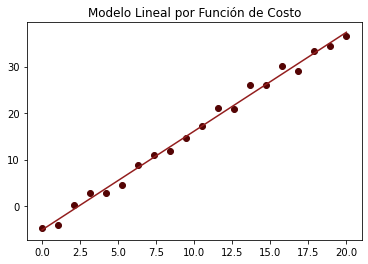

In [340]:
data = np.loadtxt(Path1_)
x = data[:,0]
y = data[:,1]

x_ = np.linspace(np.min(x),np.max(x),50)
y_ = GetModel(x_, LinealModel(x, y))

plt.title("Modelo Lineal por Función de Costo")
plt.plot(x, y, 'o', color = '#540404')
plt.plot(x_, y_, color = '#931E1E')
LinealModel(x, y)

- **$6.3)\verb| (Python)|$** Descargue los datos: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt.
Realice el ajuste usando el método de mínimos cuadrados para encontrar los parámetros de:

$$f(x) = a_{0} + a_{1}x + a_{2}x^{2}$$

Grafique los datos y el ajuste mostrando el valor de las constantes en la etiqueta de la
grafica.

In [336]:
if not path.exists('Data'):
    os.mkdir('Data')
    
file = 'Data/ModeloCuadratico.dat' 

url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt"


if not path.exists(file):
    Path2_ = wget.download(url,file)
else:
    Path2_ = file

In [337]:
data = np.loadtxt(Path2_)
x = data[:,0]
y = data[:,1]

A, b = GettingMatrix(x, y)
x0 = np.array([0., 0., 0.])

values = CuadraticModel(A, b, x0) 
values

array([1.22132053, 6.09075205, 2.9565874 ])

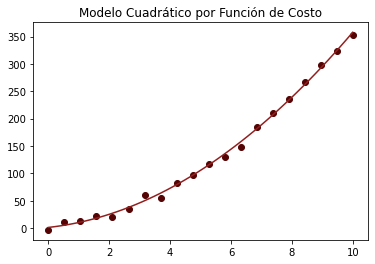

In [339]:
x_ = np.linspace(np.min(x),np.max(x),50)
y_ = GetModel(x_, values)

plt.title("Modelo Cuadrático por Función de Costo")
plt.plot(x, y, 'o', color = '#540404')
plt.plot(x_, y_, color = '#931E1E')

**$7)\verb| Machine Learning: Logistic Regresion.|$** Descargue los datos de: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv

$(a)$ Defina el modelo de ajuste como:

$$M(x;\vec{\theta}) = \frac{\theta_{0}}{\theta_{1} + e^{-\theta_{2}x}}$$

donde el $\vec{\theta}$ es el vector de parámetros del ajuste.

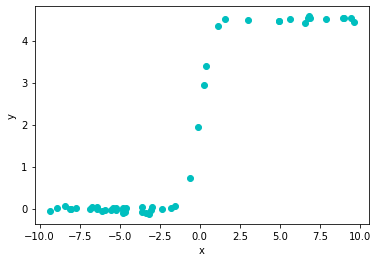

In [13]:
#Carga de datos.
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
data = pd.read_csv(url)

plt.scatter(data['x'], data['y'],color='c')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:
#Variables.
theta_0 = sym.symbols("theta_0", real=True)
theta_1 = sym.symbols("theta_1", real=True)
theta_2 = sym.symbols("theta_2", real=True)
x = sym.symbols("x", real=True)

In [7]:
def M():
  return theta_0 / (theta_1 + sym.exp(-theta_2*x))

$(b)$ Defina la métrica (función de costo) a minimizar como:

$$\mathfrak{X}^2(\vec{\theta}) = \sum_{i = 1}^{N} \left( \frac{y_{i} - M(x_{i}, \vec{\theta})}{\sigma_{i}} \right)^2$$

donde $\sigma_{i} = 1 \forall i$, es decir, no se consideran los errores de $y_{i}$.

In [8]:
def X2(x, y,theta):
    return np.sum((y - M(x, theta))**2)

$(c)$ Muestre que las derivadas parciales de la métrica están dadas por:

$$\frac{\partial\mathfrak{X}^2(\vec{\theta})}{\partial\theta_{i}} = -2 \cdot \sum_{i = 1}^{N}(y_{i} - M(x_{i}, \vec{\theta})) \cdot \frac{\partial M(x_{i}, \vec{\theta})}{\partial{\theta_{i}}}$$

**Respuesta.** 

Sea la función de costo $X^2(\vec{\theta})$ y la derivada un operador lineal, podemos ingresar dicho operador y derivar dentro de la sumatoria aplicando regla de la cadena.

$$
\frac{\partial X^2(\vec{\theta})}{\partial \theta_i} = \sum_{i=1}^N \frac{\partial}{\partial \theta_i} (y_i - M(x_i,\vec{\theta}))^2$$

$$ \frac{\partial X^2(\vec{\theta})}{\partial \theta_i} = \sum_{i=1}^N (2) (y_i - M(x_i,\vec{\theta})) \Big( -\frac{\partial M(x_i,\vec{\theta})}{\partial \theta_i}\Big) = -2\sum_{i=1}^N (y_i - M(x_i,\vec{\theta})) \frac{\partial M(x_i,\vec{\theta})}{\partial \theta_i}$$

Y así queda mostrado que las derivadas parciales están dadas por dicha expresión.

In [9]:
#Gradiente con respecto a theta.
def Gradient_M():
  M_d0_ = sym.lambdify([x,theta_0,theta_1,theta_2], sym.diff(M(), theta_0))
  M_d1_ = sym.lambdify([x,theta_0,theta_1,theta_2], sym.diff(M(), theta_1))
  M_d2_ = sym.lambdify([x,theta_0,theta_1,theta_2], sym.diff(M(), theta_2))

  return M_d0_, M_d1_, M_d2_

$(d)$ Muestre que vectorialmente, el descenso del gradiente queda definido por:

$$\vec{\theta}_{j + 1} = \vec{\theta}_{j} - \gamma \cdot \left( -2 \cdot \sum_{i = 1}^{N}(y_{i} - M(x_{i}, \vec{\theta}_{j}))  \nabla_{\theta} M(x_{i}, \vec{\theta}_{j}) \right)$$

donde el gradiente es respecto a los parámetros:

$$\nabla_{\theta} M(x_{i}, \vec{\theta}_{j}) = \left[ \frac{\partial M(x_{i}, \vec{\theta})}{\partial\theta_{0}}, \frac{\partial M(x_{i}, \vec{\theta})}{\partial\theta_{1}},\frac{\partial M(x_{i}, \vec{\theta})}{\partial\theta_{2}} \right]$$

**Respuesta.**

La forma en la que funciona el método del descenso gradiente vectorialmente es sencilla de ver si se comprende la función del gradiente como operador. Sea $f$ una función vectorial podemos imaginarla como si se tratara de una montaña, donde el gradiente nos indicará la dirección de la pendiente más pronunciada evaluada en un punto. Dicha noción nos daría un método para maximizar la función, ya que únicamente deberíamos "subir la montaña" en dirección del gradiente. Sin embargo, como queremos minimizar la función, debemos avanzar en dirección contraria al gradiente. De una manera formal, sea $x_0$ nuestro punto inicial y $f$ la función a minimizar podemos escribir el paso siguiente de la manera,

$$ x_1 = x_0 -\alpha \nabla_ x f(x_0) \rightarrow x_{n+1} = x_n -\alpha \nabla_ x f(x_n)$$

Donde $\alpha$ será el paso o la distancia positiva recorrida. Para nuestro caso, sea $X^2(\vec{\theta})$ la función a minimizar podemos expresar su gradiente de la forma,

$$\nabla_{\theta}X^2(\vec{\theta}) = \left[ -2\sum_{i=1}^N (y_i - M(x_i,\vec{\theta_0})) \frac{\partial M(x_i,\vec{\theta})}{\partial \theta_0}, -2\sum_{i=1}^N (y_i - M(x_i,\vec{\theta_1})) \frac{\partial M(x_i,\vec{\theta})}{\partial \theta_1}, -2\sum_{i=1}^N (y_i - M(x_i,\vec{\theta_2})) \frac{\partial M(x_i,\vec{\theta})}{\partial \theta_2} \right] $$

De una manera general y más organizada, se puede expresar dicho gradiente como la multiplicación entre el gradiente de la función $M$ y parte de la derivada de la función de costo evaluada en el $\vec{\theta}$ correspondiente.

$$\nabla_{\theta}X^2(\vec{\theta}) = -2 \cdot \sum_{i = 1}^{N}(y_{i} - M(x_{i}, \vec{\theta}_{j}))\nabla_{\theta} M(x_{i}, \vec{\theta}_{j})$$

Donde,

$$\nabla_{\theta} M(x_{i}, \vec{\theta}_{j}) = \left[ \frac{\partial M(x_{i}, \vec{\theta})}{\partial\theta_{0}}, \frac{\partial M(x_{i}, \vec{\theta})}{\partial\theta_{1}},\frac{\partial M(x_{i}, \vec{\theta})}{\partial\theta_{2}} \right] $$

Ahora bien, sea $\vec{\theta}_j$ el vector inicial y $\gamma$ la distancia positiva recorrida, podemos expresar el método del gradiente descendiente para $\vec{\theta}$ como:

$$\vec{\theta}_{j + 1} = \vec{\theta}_{j} - \gamma \cdot \left( -2 \cdot \sum_{i = 1}^{N}(y_{i} - M(x_{i}, \vec{\theta}_{j})) \nabla_{\theta} M(x_{i}, \vec{\theta}_{j}) \right)$$

Así queda mostrado que vectorialmente, el descenso del gradiente queda definido por la expresión dada.

In [10]:
#Implementación del método.
def DescendentGradient(Mod,x,y,theta,e,it,r):
  error = e + 1
  iterations = 0
  d0, d1, d2 = Gradient_M()

  while error > e and iterations < it:
    sumatory = 0

    for i in range(len(y)):
      d_0 = d0(x[i],theta[0], theta[1], theta[2])
      d_1 = d1(x[i],theta[0], theta[1], theta[2])
      d_2 = d2(x[i],theta[0], theta[1], theta[2])

      #Sumatoria dada por la derivada en cada punto
      sumatory += (y[i]-Mod(x[i],theta[0],theta[1],theta[2]))*np.array([d_0,d_1,d_2])
    
    #Expresion del descenso gradiente demostrada vectorialmente.
    theta_j = theta - (r * (-2*sumatory))
    #Renovamos la variable theta.
    theta = theta_j

    #El error estará dado por norma del vector que sale de la expresión que minimizamos.
    error = np.linalg.norm(r * (-2*sumatory))
    iterations += 1

  return theta_j

$(e)$ Use una taza de aprendizaje $\gamma = 1 \times 10^{-3}$ o $\gamma = 5 \times 10^{-4}$, $\vec{\theta}_{0} = [1, 1, 1]$, un error de parada $\epsilon = 0.01$ y un máximo de iteraciones de $1 \times 10^{4}$.

In [11]:
#Datos.
X = np.array(data['x'])
Y = np.array(data['y'])

#Parámetros.
theta = np.array([1., 1., 1.])
r = 1e-3
e = 0.01
it = 10000

$(f)$ Grafique los datos y the best fit model con sus parámetros.

Text(0, 0.5, 'y')

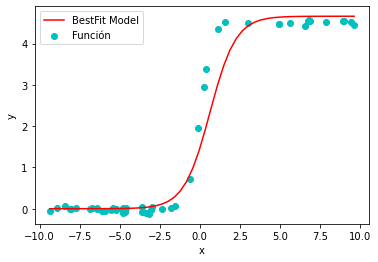

In [15]:
#Devolvemos las variables de sympy.
M_ = sym.lambdify([x,theta_0,theta_1,theta_2],M())
#Los theta_i serán los parámetros minimizados.
theta_i = DescendentGradient(M_,X,Y,theta,e,it,r)

#Definimos los x usados para el ploteo.
_x = np.linspace(np.min(X),np.max(X),50)
#Definimos los y dados el theta óptimo.
_y = []
for i in _x:
    _y.append(theta_i[0] / (theta_i[1] + sym.exp(-theta_i[2]*i)))

#Ploteo
plt.scatter(X,Y,color='c', label='Función')
plt.plot(_x,_y,color='r',label='BestFit Model')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')